<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploration" data-toc-modified-id="Exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploration</a></span><ul class="toc-item"><li><span><a href="#Categorical-variable-influence" data-toc-modified-id="Categorical-variable-influence-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Categorical variable influence</a></span></li><li><span><a href="#Dummy-model-on-categorical-variables" data-toc-modified-id="Dummy-model-on-categorical-variables-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dummy model on categorical variables</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>RandomForest</a></span></li></ul></li><li><span><a href="#Dummy-model-on-continuous-features" data-toc-modified-id="Dummy-model-on-continuous-features-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Dummy model on continuous features</a></span></li></ul></li><li><span><a href="#Integration" data-toc-modified-id="Integration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Integration</a></span></li></ul></div>

In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
from pathlib import Path
import os
import pandas as pd

import random
random.seed(1)

# Exploration

In [3]:
data = Path("auto-insurance-fall-2017")
os.listdir(data)

['test_auto.csv', 'SHELL_AUTO.csv', 'train_auto.csv', 'MEAN_AUTO.csv']

In [4]:
train = pd.read_csv(data / "train_auto.csv")
test = pd.read_csv(data / "test_auto.csv")

full = pd.concat([train, test], axis=0, join="outer")

In [5]:
# the flag is a categorical variable
train.TARGET_FLAG.unique()

array([0, 1])

In [6]:
# Of course the dataset is biased
train.TARGET_FLAG.astype('object').describe()

count     8161
unique       2
top          0
freq      6008
Name: TARGET_FLAG, dtype: int64

In [7]:
{
    c: train[c].unique() for c in train.columns
}

{'INDEX': array([    1,     2,     4, ..., 10299, 10301, 10302]),
 'TARGET_FLAG': array([0, 1]),
 'TARGET_AMT': array([   0.        , 2946.        , 4021.        , ...,  471.11545805,
        3135.        , 1815.205097  ]),
 'KIDSDRIV': array([0, 1, 2, 3, 4]),
 'AGE': array([60., 43., 35., 51., 50., 34., 54., 37., 53., 55., 45., 39., 42.,
        31., 28., 48., 47., 44., 33., 32., 40., 49., 52., 41., 56., 38.,
        63., 59., 46., 30., 29., 58., 36., 66., 61., 62., 80., 57., 64.,
        nan, 25., 27., 26., 20., 21., 19., 72., 69., 24., 67., 23., 65.,
        70., 22., 17., 16., 81., 73., 68., 18., 76.]),
 'HOMEKIDS': array([0, 1, 2, 3, 4, 5]),
 'YOJ': array([11., 10., 14., nan, 12.,  7.,  5.,  0., 13.,  9., 17.,  8., 15.,
        16.,  6., 18., 23.,  3.,  4.,  2., 19.,  1.]),
 'INCOME': array(['$67,349', '$91,449', '$16,039', ..., '$107,204', '$43,445',
        '$53,235'], dtype=object),
 'PARENT1': array(['No', 'Yes'], dtype=object),
 'HOME_VAL': array(['$0', '$257,252', '$124,191'

In [8]:
cat_var = [
    'CAR_TYPE',
    'HOMEKIDS',
    'PARENT1',
    'MSTATUS',
    'URBANICITY', 
    "KIDSDRIV",
    "SEX",
    "EDUCATION",
    "JOB",
    'CAR_USE',
    "RED_CAR",
    "CLM_FREQ",
    "REVOKED",
]

cont_var = [
    "YOJ",
    "INCOME",
    "HOME_VAL",
    "TRAVTIME",
    "BLUEBOOK",
    "OLDCLAIM",
    "MVR_PTS",
    "CAR_AGE",
]

There are many categorical variables, let's explore one by one how they influence the flag and try to rule some out

## Categorical variable influence

In [7]:
pd.concat([
    train.groupby("KIDSDRIV")['TARGET_FLAG'].mean().to_frame('mean'),
    train.groupby("KIDSDRIV")['TARGET_FLAG'].count().to_frame('count'),
], axis=1)

,mean,count
KIDSDRIV,,
0,0.246936,7180
1,0.371069,636
2,0.397849,279
3,0.500000,62
4,0.500000,4


In [8]:
pd.concat([
    train.groupby("HOMEKIDS")['TARGET_FLAG'].mean().to_frame('mean'),
    train.groupby("HOMEKIDS")['TARGET_FLAG'].count().to_frame('count'),
], axis=1)

,mean,count
HOMEKIDS,,
0,0.221781,5289
1,0.338137,902
2,0.341682,1118
3,0.341246,674
4,0.347561,164
5,0.428571,14


In [9]:
pd.concat([
    train.groupby("SEX")['TARGET_FLAG'].mean().to_frame('mean'),
    train.groupby("SEX")['TARGET_FLAG'].count().to_frame('count'),
], axis=1)

,mean,count
SEX,,
M,0.253830,3786
z_F,0.272457,4375


In [10]:
pd.concat([
    train.groupby("EDUCATION")['TARGET_FLAG'].mean().to_frame('mean'),
    train.groupby("EDUCATION")['TARGET_FLAG'].count().to_frame('count'),
], axis=1)

,mean,count
EDUCATION,,
<High School,0.320033,1203
Bachelors,0.233274,2242
Masters,0.197226,1658
PhD,0.171703,728
z_High School,0.340343,2330


In [11]:
pd.concat([
    train.groupby("JOB")['TARGET_FLAG'].mean().to_frame('mean'),
    train.groupby("JOB")['TARGET_FLAG'].count().to_frame('count'),
], axis=1)

,mean,count
JOB,,
Clerical,0.291896,1271
Doctor,0.117886,246
Home Maker,0.280811,641
Lawyer,0.183234,835
Manager,0.138664,988
Professional,0.221128,1117
Student,0.373596,712
z_Blue Collar,0.347397,1825


In [12]:
pd.concat([
    train.groupby("CAR_USE")['TARGET_FLAG'].mean().to_frame('mean'),
    train.groupby("CAR_USE")['TARGET_FLAG'].count().to_frame('count'),
], axis=1)

,mean,count
CAR_USE,,
Commercial,0.345659,3029
Private,0.215511,5132


In [13]:
pd.concat([
    train.groupby("CAR_TYPE")['TARGET_FLAG'].mean().to_frame('mean'),
    train.groupby("CAR_TYPE")['TARGET_FLAG'].count().to_frame('count'),
], axis=1)

,mean,count
CAR_TYPE,,
Minivan,0.162704,2145
Panel Truck,0.263314,676
Pickup,0.318934,1389
Sports Car,0.335171,907
Van,0.268000,750
z_SUV,0.295554,2294


In [14]:
pd.concat([
    train.groupby("RED_CAR")['TARGET_FLAG'].mean().to_frame('mean'),
    train.groupby("RED_CAR")['TARGET_FLAG'].count().to_frame('count'),
], axis=1)

,mean,count
RED_CAR,,
no,0.265779,5783
yes,0.259041,2378


In [15]:
pd.concat([
    train.groupby("CLM_FREQ")['TARGET_FLAG'].mean().to_frame('mean'),
    train.groupby("CLM_FREQ")['TARGET_FLAG'].count().to_frame('count'),
], axis=1)

,mean,count
CLM_FREQ,,
0,0.179277,5009
1,0.386158,997
2,0.400512,1171
3,0.404639,776
4,0.421053,190
5,0.388889,18


In [16]:
pd.concat([
    train.groupby("REVOKED")['TARGET_FLAG'].mean().to_frame('mean'),
    train.groupby("REVOKED")['TARGET_FLAG'].count().to_frame('count'),
], axis=1)

,mean,count
REVOKED,,
No,0.238793,7161
Yes,0.443000,1000


In [17]:
pd.concat([
    train.groupby("URBANICITY")['TARGET_FLAG'].mean().to_frame('mean'),
    train.groupby("URBANICITY")['TARGET_FLAG'].count().to_frame('count'),
], axis=1)

,mean,count
URBANICITY,,
Highly Urban/ Urban,0.313925,6492
z_Highly Rural/ Rural,0.068904,1669


## Dummy model on categorical variables

### Logistic Regression

In [9]:
import sklearn.preprocessing

In [10]:
to_hot_encode = [
    'CAR_TYPE',
    'PARENT1',
    'MSTATUS',
    'URBANICITY', 
    "KIDSDRIV",
    "SEX",
    "EDUCATION",
    "JOB",
    'CAR_USE',
    "RED_CAR",
    "REVOKED",
]

dtrain = train[to_hot_encode + ['TARGET_FLAG']].copy()
dtrain['JOB'] = dtrain['JOB'].fillna("Unknown") # only "JOB" has nan in the categorical vars

enc = sklearn.preprocessing.OneHotEncoder()

for c in to_hot_encode:
    enc.fit(dtrain[[c]])
    dtrain[enc.categories_[0]] = enc.transform(dtrain[[c]]).toarray()


dtrain = dtrain.drop(columns=to_hot_encode)

In [11]:
import sklearn.linear_model
import sklearn.metrics

In [12]:
clf = sklearn.linear_model.LogisticRegression(random_state=1)

In [13]:
traintestlim = len(dtrain)*2//3

In [14]:
# with 3994 0 and 1446 1 we need to even out the samples
one_index = train.iloc[:traintestlim][
    train['TARGET_FLAG'].iloc[:traintestlim] == 1
].index
zero_index = train.iloc[:traintestlim][
    train['TARGET_FLAG'].iloc[:traintestlim] == 0
].index

In [16]:
augmented_one_index = np.random.choice(one_index, size=len(zero_index) - len(one_index), replace=True, p=None)

In [17]:
train_index = list(zero_index) + list(one_index) + list(augmented_one_index)
random.shuffle(train_index)
augmented_train = dtrain.loc[train_index]

In [18]:
X = augmented_train.drop(columns=['TARGET_FLAG'])
Y = augmented_train['TARGET_FLAG']
clf.fit(X, Y)

/home/simonbenarous/Envs/edf-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=1)

In [19]:
Yhat = train['TARGET_FLAG'].copy().to_frame("y")
Yhat['yhat'] = clf.predict(dtrain.drop(columns=['TARGET_FLAG']))

In [20]:
def make_metrics(yhat, y, lim):
    yhat_train = yhat.iloc[:traintestlim]
    y_train = y.iloc[:traintestlim]
    yhat_test = yhat.iloc[traintestlim:]
    y_test = y.iloc[traintestlim:]
    
    most_freq_train = pd.Series(
        y_train.value_counts().argmax(),
        index=y_train.index
    )
    most_freq_test = pd.Series(
        y_train.value_counts().argmax(),
        index=y_test.index
    )
    
    df = pd.DataFrame(
        [
            [sklearn.metrics.accuracy_score(y_train, yhat_train), 
             sklearn.metrics.accuracy_score(y_test, yhat_test)],
            [sklearn.metrics.f1_score(y_train, yhat_train), 
             sklearn.metrics.f1_score(y_test, yhat_test)],
        ],
        index=['Accuracy', 'F1-Score'],
        columns=['Train', 'Test']
    )
    return df

In [21]:
display(make_metrics(Yhat['yhat'], Yhat['y'], lim=traintestlim))

,Train,Test
Accuracy,0.699265,0.702315
F1-Score,0.565125,0.562162


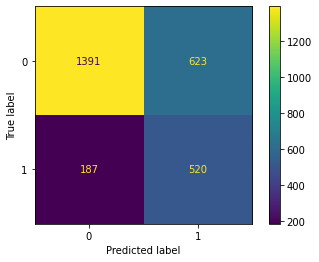

In [23]:
confusion_matrix = sklearn.metrics.confusion_matrix(
    train['TARGET_FLAG'].iloc[traintestlim:],
    Yhat['yhat'].iloc[traintestlim:],
)
sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix).plot()

### RandomForest

In [24]:
import sklearn.ensemble

In [25]:
rfclf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, oob_score=True)

In [26]:
traintestlim = len(dtrain)*2//3

In [27]:
# with 3994 0 and 1446 1 we need to even out the samples
one_index = train.iloc[:traintestlim][
    train['TARGET_FLAG'].iloc[:traintestlim] == 1
].index
zero_index = train.iloc[:traintestlim][
    train['TARGET_FLAG'].iloc[:traintestlim] == 0
].index

In [28]:
augmented_one_index = np.random.choice(one_index, size=len(zero_index) - len(one_index), replace=True, p=None)

In [29]:
train_index = list(zero_index) + list(one_index) + list(augmented_one_index)
random.shuffle(train_index)
augmented_train = dtrain.loc[train_index]

In [30]:
X = augmented_train.drop(columns=['TARGET_FLAG'])
Y = augmented_train['TARGET_FLAG']
rfclf.fit(X, Y)

RandomForestClassifier(oob_score=True)

In [31]:
Yhat = train['TARGET_FLAG'].copy().to_frame("y")
Yhat['yhat'] = rfclf.predict(dtrain.drop(columns=['TARGET_FLAG']))

In [32]:
display(make_metrics(Yhat['yhat'], Yhat['y'], lim=traintestlim))

,Train,Test
Accuracy,0.803860,0.694230
F1-Score,0.697819,0.510012


In [33]:
# Little bit of overfit ?

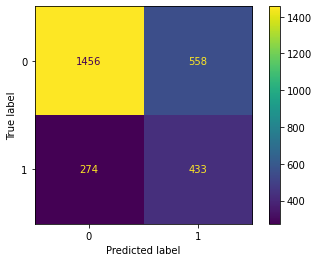

In [35]:
confusion_matrix = sklearn.metrics.confusion_matrix(
    train['TARGET_FLAG'].iloc[traintestlim:],
    Yhat['yhat'].iloc[traintestlim:],
)
sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix).plot()

In [78]:
from sklearn.model_selection import GridSearchCV

X = augmented_train.drop(columns=['TARGET_FLAG'])
Y = augmented_train['TARGET_FLAG']

parameters = {'n_estimators': [10, 100, 1000], 'max_depth': [5, 50, 500]}
gridsearch = GridSearchCV(rfclf , parameters, scoring='f1', n_jobs=8)
gridsearch.fit(X , Y)

GridSearchCV(estimator=RandomForestClassifier(oob_score=True), n_jobs=8,
             param_grid={'max_depth': [5, 50, 500],
                         'n_estimators': [10, 100, 1000]},
             scoring='f1')

In [79]:
pd.DataFrame(gridsearch.cv_results_).groupby(['param_max_depth' , 'param_n_estimators'])['rank_test_score'].last().unstack()

param_n_estimators,10,100,1000
param_max_depth,,,
5,9,7,8
50,5,2,3
500,6,4,1


In [80]:
pd.DataFrame(gridsearch.cv_results_).groupby(['param_max_depth' , 'param_n_estimators'])['rank_test_score'].last().unstack()

param_n_estimators,10,100,1000
param_max_depth,,,
5,9,7,8
50,5,2,3
500,6,4,1


We could have gone with boosted trees for example, which are known to be good classifiers

## Dummy model on continuous features

In [36]:
train[cont_var].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YOJ       7707 non-null   float64
 1   INCOME    7716 non-null   object 
 2   HOME_VAL  7697 non-null   object 
 3   TRAVTIME  8161 non-null   int64  
 4   BLUEBOOK  8161 non-null   object 
 5   OLDCLAIM  8161 non-null   object 
 6   MVR_PTS   8161 non-null   int64  
 7   CAR_AGE   7651 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 510.2+ KB


In [37]:
def formatcol(x):
    if type(x) == str:
        return float(x.strip('$').replace(',', ''))
    elif type(x) == float:
        return x
    else:
        print(x)
        return x

train['INCOME'] = train['INCOME'].apply(formatcol)
train["HOME_VAL"] = train["HOME_VAL"].apply(formatcol)
train["BLUEBOOK"] = train["BLUEBOOK"].apply(formatcol)
train["OLDCLAIM"] = train["OLDCLAIM"].apply(formatcol)

In [38]:
(len(train) - len(train[cont_var].dropna())) / len(train)

0.20953314544786178

In [39]:
# 20%, we will need inputing later

In [40]:
for c in cont_var:
    print(f"{c} corr: {train['TARGET_FLAG'].corr(train[c])}")

YOJ corr: -0.07051182504552558
INCOME corr: -0.14200809706376555
HOME_VAL corr: -0.1837370769863411
TRAVTIME corr: 0.048368310346376654
BLUEBOOK corr: -0.10338318928044014
OLDCLAIM corr: 0.138083829657856
MVR_PTS corr: 0.21919705378703594
CAR_AGE corr: -0.10065061495465867


Let's scale the features before modelling (and inputing)

In [41]:
dtrain = (train[cont_var].dropna() - train[cont_var].dropna().mean()) / train[cont_var].dropna().std()
dtrain['TARGET_FLAG'] = train['TARGET_FLAG'].loc[dtrain.index]

In [42]:
import sklearn.ensemble

In [65]:
gbclf = sklearn.ensemble.GradientBoostingClassifier(
    learning_rate=0.1, 
    n_estimators=100,
    random_state=1,
    loss='exponential'
)

In [66]:
traintestlim = len(dtrain)*2//3

In [67]:
dtrain['TARGET_FLAG'].astype('object').describe()

count     6451
unique       2
top          0
freq      4745
Name: TARGET_FLAG, dtype: int64

In [74]:
# with 4745 0 and 1706 1 we need to even out the samples
one_index = dtrain.iloc[:traintestlim][
    dtrain['TARGET_FLAG'].iloc[:traintestlim] == 1
].index
zero_index = dtrain.iloc[:traintestlim][
    dtrain['TARGET_FLAG'].iloc[:traintestlim] == 0
].index

In [75]:
augmented_one_index = np.random.choice(one_index, size=len(zero_index) - len(one_index), replace=True, p=None)
# augmented_one_index = []

In [76]:
train_index = list(zero_index) + list(one_index) + list(augmented_one_index)
random.shuffle(train_index)
augmented_train = dtrain.loc[train_index]

In [77]:
X = augmented_train.drop(columns=['TARGET_FLAG'])
Y = augmented_train['TARGET_FLAG']
gbclf.fit(X, Y)

GradientBoostingClassifier(loss='exponential', random_state=1)

In [78]:
Yhat = dtrain['TARGET_FLAG'].copy().to_frame("y")
Yhat['yhat'] = gbclf.predict(dtrain.drop(columns=['TARGET_FLAG']))

In [79]:
display(make_metrics(Yhat['yhat'], Yhat['y'], lim=traintestlim))

,Train,Test
Accuracy,0.723953,0.669456
F1-Score,0.578630,0.488857


In [55]:
# Looks like overfitting the train... Also we notice that using an augmented train set 
# improves generalization (and f1) at the expense of accuracy

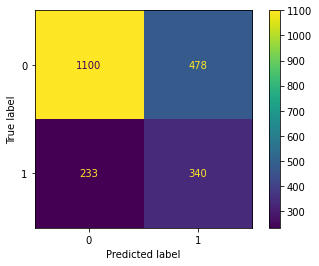

In [80]:
confusion_matrix = sklearn.metrics.confusion_matrix(
    dtrain['TARGET_FLAG'].iloc[traintestlim:],
    Yhat['yhat'].iloc[traintestlim:],
)
sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix).plot()

In [81]:
from sklearn.model_selection import GridSearchCV

X = augmented_train.drop(columns=['TARGET_FLAG'])
Y = augmented_train['TARGET_FLAG']

parameters = {'n_estimators': [1, 10, 100], 'max_depth': [2, 10, 50]}
gridsearch = GridSearchCV(gbclf , parameters, scoring='f1', n_jobs=8)
gridsearch.fit(X , Y)

GridSearchCV(estimator=GradientBoostingClassifier(loss='exponential',
                                                  random_state=1),
             n_jobs=8,
             param_grid={'max_depth': [2, 10, 50],
                         'n_estimators': [1, 10, 100]},
             scoring='f1')

In [82]:
pd.DataFrame(gridsearch.cv_results_).groupby(['param_max_depth' , 'param_n_estimators'])['rank_test_score'].last().unstack()

param_n_estimators,1,10,100
param_max_depth,,,
2,7,9,8
10,6,5,1
50,4,3,2


In [83]:
gridsearch.cv_results_

{'mean_fit_time': array([ 0.02262459,  0.11292343,  1.16448178,  0.06405506,  0.61947861,
         6.39982343,  0.11212354,  1.55782185, 14.78386874]),
 'std_fit_time': array([0.01471911, 0.02235435, 0.13399801, 0.00969346, 0.06140606,
        0.40986475, 0.02676529, 0.23515116, 0.78985618]),
 'mean_score_time': array([0.00742097, 0.00653467, 0.01205025, 0.00667086, 0.00649047,
        0.02266741, 0.00540624, 0.0089807 , 0.03185863]),
 'std_score_time': array([0.00149928, 0.00128322, 0.00141123, 0.00270606, 0.00088445,
        0.00538156, 0.00022463, 0.00140338, 0.00201776]),
 'param_max_depth': masked_array(data=[2, 2, 2, 10, 10, 10, 50, 50, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[1, 10, 100, 1, 10, 100, 1, 10, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False],
     

In [84]:
Yhat = dtrain['TARGET_FLAG'].copy().to_frame("y")
Yhat['yhat'] = gridsearch.best_estimator_.predict(dtrain.drop(columns=['TARGET_FLAG']))

In [85]:
display(make_metrics(Yhat['yhat'], Yhat['y'], lim=traintestlim))

,Train,Test
Accuracy,0.999070,0.726174
F1-Score,0.998232,0.387097


In [88]:
gridsearch.best_score_

0.882774860966032

In [63]:
# Definitely is overfitting the train... Hence better accuracy

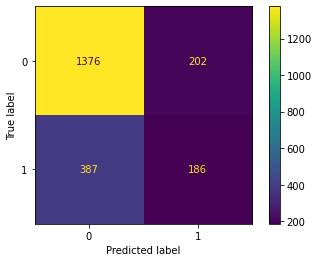

In [87]:
confusion_matrix = sklearn.metrics.confusion_matrix(
    dtrain['TARGET_FLAG'].iloc[traintestlim:],
    Yhat['yhat'].iloc[traintestlim:],
)
sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix).plot()

In [89]:
from sklearn.model_selection import GridSearchCV

X = augmented_train.drop(columns=['TARGET_FLAG'])
Y = augmented_train['TARGET_FLAG']

parameters = {'n_estimators': [100, 1000], 'max_depth': [10, 50], "learning_rate": [1]}
gridsearch = GridSearchCV(gbclf , parameters, scoring='f1', n_jobs=8)
gridsearch.fit(X , Y)

GridSearchCV(estimator=GradientBoostingClassifier(loss='exponential',
                                                  random_state=1),
             n_jobs=8,
             param_grid={'learning_rate': [1], 'max_depth': [10, 50],
                         'n_estimators': [100, 1000]},
             scoring='f1')

In [90]:
pd.DataFrame(gridsearch.cv_results_).groupby(['param_max_depth' , 'param_n_estimators', "param_learning_rate"])['rank_test_score'].last().unstack()

param_learning_rate                 1
param_max_depth param_n_estimators   
10              100                 2
                1000                1
50              100                 3
                1000                4

In [91]:
gridsearch.best_score_

0.9040466335814148

In [92]:
gridsearch.cv_results_

{'mean_fit_time': array([  6.18481946,  82.74751644,  20.51299286, 184.7374454 ]),
 'std_fit_time': array([ 0.53790527,  0.82478822,  0.55417864, 13.28512878]),
 'mean_score_time': array([0.01899924, 0.16665993, 0.04761939, 0.28612714]),
 'std_score_time': array([0.00233835, 0.02472368, 0.00774204, 0.03052972]),
 'param_learning_rate': masked_array(data=[1, 1, 1, 1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[10, 10, 50, 50],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 1000, 100, 1000],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 1, 'max_depth': 10, 'n_estimators': 100},
  {'learning_rate': 1, 'max_depth': 10, 'n_estimators': 1000},
  {'learning_rate': 1, 'max_depth': 50, 'n_estimators': 100},
  {'learn

In [93]:
Yhat = dtrain['TARGET_FLAG'].copy().to_frame("y")
Yhat['yhat'] = gridsearch.best_estimator_.predict(dtrain.drop(columns=['TARGET_FLAG']))

In [94]:
display(make_metrics(Yhat['yhat'], Yhat['y'], lim=traintestlim))

,Train,Test
Accuracy,1.0,0.736867
F1-Score,1.0,0.304668


In [105]:
(Yhat['y'].iloc[traintestlim:] == 0).sum() / len(Yhat['y'].iloc[traintestlim:])

0.7336122733612274

In [106]:
gridsearch.best_score_

0.9040466335814148

In [107]:
# Definitely is overfitting the train... Hence better accuracy

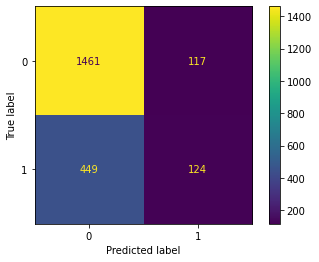

In [113]:
confusion_matrix = sklearn.metrics.confusion_matrix(
    dtrain['TARGET_FLAG'].iloc[traintestlim:],
    Yhat['yhat'].iloc[traintestlim:],
)
sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix).plot()

# Integration

Let's go for a custom algo and try to chain the categorical var classifier with the continuous one

In [114]:
to_hot_encode = [
    'CAR_TYPE',
    'PARENT1',
    'MSTATUS',
    'URBANICITY', 
    "KIDSDRIV",
    "SEX",
    "EDUCATION",
    "JOB",
    'CAR_USE',
    "RED_CAR",
    "REVOKED",
]

dtrain = train[to_hot_encode + ['TARGET_FLAG']].copy()
dtrain['JOB'] = dtrain['JOB'].fillna("Unknown") # only "JOB" has nan in the categorical vars

enc = sklearn.preprocessing.OneHotEncoder()

for c in to_hot_encode:
    enc.fit(dtrain[[c]])
    dtrain[enc.categories_[0]] = enc.transform(dtrain[[c]]).toarray()


dtrain = dtrain.drop(columns=to_hot_encode)

In [119]:
dtrain_cont = (train[cont_var].dropna() - train[cont_var].dropna().mean()) / train[cont_var].dropna().std()
# dtrain_cont = (train[cont_var].dropna() - train[cont_var].dropna().min()) / (train[cont_var].dropna().max() - train[cont_var].dropna().min())

In [120]:
dtrain = dtrain.merge(dtrain_cont, left_index=True, right_index=True)

In [145]:
rfclf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, oob_score=True)

In [146]:
traintestlim = len(dtrain)*2//3

In [147]:
one_index = dtrain.iloc[:traintestlim][
    dtrain['TARGET_FLAG'].iloc[:traintestlim] == 1
].index
zero_index = dtrain.iloc[:traintestlim][
    dtrain['TARGET_FLAG'].iloc[:traintestlim] == 0
].index

In [155]:
augmented_one_index = np.random.choice(one_index, size=len(zero_index) - len(one_index), replace=True)

In [149]:
train_index = list(zero_index) + list(one_index) + list(augmented_one_index)
random.shuffle(train_index)
augmented_train = dtrain.loc[train_index]

In [176]:
X = augmented_train.drop(columns=['TARGET_FLAG'])
Y = augmented_train['TARGET_FLAG']
rfclf.fit(X, Y)

RandomForestClassifier(oob_score=True)

In [177]:
Yhat = dtrain['TARGET_FLAG'].copy().to_frame("y")
Yhat['yhat'] = rfclf.predict(dtrain.drop(columns=['TARGET_FLAG']))

In [178]:
display(make_metrics(Yhat['yhat'], Yhat['y'], lim=traintestlim))

,Train,Test
Accuracy,1.0,0.784751
F1-Score,1.0,0.536537


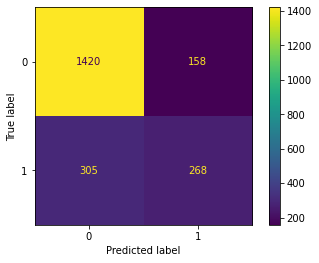

In [179]:
confusion_matrix = sklearn.metrics.confusion_matrix(
    dtrain['TARGET_FLAG'].iloc[traintestlim:],
    Yhat['yhat'].iloc[traintestlim:],
)
sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix).plot()

In [165]:
X = augmented_train.drop(columns=['TARGET_FLAG'])
Y = augmented_train['TARGET_FLAG']

parameters = {'n_estimators': [10, 100, 1000], 'max_depth': [50, 500, 1000]}
gridsearch = GridSearchCV(rfclf , parameters, scoring='f1', n_jobs=8)
gridsearch.fit(X , Y)

GridSearchCV(estimator=RandomForestClassifier(oob_score=True), n_jobs=8,
             param_grid={'max_depth': [50, 500, 1000],
                         'n_estimators': [10, 100, 1000]},
             scoring='f1')

In [166]:
pd.DataFrame(gridsearch.cv_results_).groupby(['param_max_depth' , 'param_n_estimators'])['rank_test_score'].last().unstack()

param_n_estimators,10,100,1000
param_max_depth,,,
50,9,5,2
500,8,4,3
1000,7,6,1


In [172]:
Yhat = dtrain['TARGET_FLAG'].copy().to_frame("y")
Yhat['yhat'] = gridsearch.best_estimator_.predict(dtrain.drop(columns=['TARGET_FLAG']))

In [173]:
display(make_metrics(Yhat['yhat'], Yhat['y'], lim=traintestlim))

,Train,Test
Accuracy,1.0,0.788935
F1-Score,1.0,0.547809


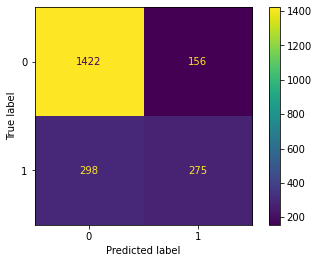

In [175]:
confusion_matrix = sklearn.metrics.confusion_matrix(
    dtrain['TARGET_FLAG'].iloc[traintestlim:],
    Yhat['yhat'].iloc[traintestlim:],
)
sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix).plot()

No time for now to implement more, but we should probably regularize a bit the gradient boosting algorithm that overfits. 

Also I would have liked to try a few more things:
- Inputing (especially on the test set, as I realize there are also missing inputs)
- MLP
- Using the continuous and categorical models as features in a Log reg or expert model

Outputting a csv

In [194]:
test['INCOME'] = test['INCOME'].apply(formatcol)
test["HOME_VAL"] = test["HOME_VAL"].apply(formatcol)
test["BLUEBOOK"] = test["BLUEBOOK"].apply(formatcol)
test["OLDCLAIM"] = test["OLDCLAIM"].apply(formatcol)

In [195]:
to_hot_encode = [
    'CAR_TYPE',
    'PARENT1',
    'MSTATUS',
    'URBANICITY', 
    "KIDSDRIV",
    "SEX",
    "EDUCATION",
    "JOB",
    'CAR_USE',
    "RED_CAR",
    "REVOKED",
]

dtest = test[to_hot_encode + ['TARGET_FLAG']].copy()
dtest['JOB'] = dtest['JOB'].fillna("Unknown") # only "JOB" has nan in the categorical vars

enc = sklearn.preprocessing.OneHotEncoder()

for c in to_hot_encode:
    enc.fit(dtest[[c]])
    dtest[enc.categories_[0]] = enc.transform(dtest[[c]]).toarray()


dtest = dtest.drop(columns=to_hot_encode)

In [196]:
dtest_cont = (test[cont_var].dropna() - test[cont_var].dropna().mean()) / test[cont_var].dropna().std()

In [199]:
dtest = dtest.merge(dtest_cont, left_index=True, right_index=True)

In [201]:
dtest

,TARGET_FLAG,Minivan,Panel Truck,Pickup,Sports Car,Van,z_SUV,No,Yes,z_No,...,no,yes,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,OLDCLAIM,MVR_PTS,CAR_AGE
0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.151512,-0.151524,-1.185449,-0.466953,0.782443,-0.475455,0.101663,0.325420
1,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.151512,-0.195964,-1.185449,-0.785684,0.421054,-0.096427,0.101663,-1.250557
2,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.388733,-0.353611,-1.185449,-0.211968,-1.127928,-0.475455,-0.799904,0.325420
4,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.388733,0.592273,-1.185449,0.744227,0.003791,4.684498,1.003230,-1.250557
6,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.388733,-0.472906,0.235085,-1.104416,-0.487175,-0.475455,-0.799904,-1.250557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,-2.457919,-1.288997,-1.185449,-0.084475,-1.650991,1.884870,0.552446,-0.024797
2137,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.388733,-0.353288,-0.136196,1.700421,0.082251,-0.475455,0.101663,-1.250557
2138,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,-0.085709,1.745707,1.874415,0.552988,0.680208,-0.475455,-0.799904,2.426723
2139,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,-0.085709,1.475540,-1.185449,-0.976923,2.088913,-0.015905,-0.349121,1.200963


In [206]:
[x for x in augmented_train.columns if x not in dtest.columns]

[4]

In [208]:
dtest[4] = 0 #Missing in the test set

In [209]:
Yhat = dtest['TARGET_FLAG'].copy().to_frame("y")
Yhat['yhat'] = gridsearch.best_estimator_.predict(dtest.drop(columns=['TARGET_FLAG']))

In [212]:
Yhat[['yhat']].to_csv("prediction.csv")